# Agrupamiento difuso de medias (FCM)
Ejemplo de implementación del algoritmo FCM utilizando el conjunto de datos Iris.

## Instalación de la librería scikit-fuzzy
En caso de que no se cuente con la librería

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 687kB/s eta 0:00:01
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894070 sha256=d372584c2988043198206cc3a48d77df7b94190c6b2df518cabe8d85dd6afb9f
  Stored in directory: /home/jorgeo80/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


### Conjunto de Datos

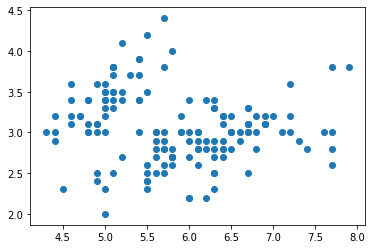

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

datos = load_iris()

plt.scatter(datos.data[:,0],datos.data[:,1])

### Creación del modelo FCM
Se utilizan las primeras dos características del conjunto de datos

In [7]:
import numpy as np
X = np.array(datos.data[:,0:2])

# Crear modelo
k = 3

import skfuzzy as fuzz

modelo = fuzz.cluster.cmeans(data = np.transpose(X), c = k, m =2, error = 0.005, maxiter = 1000)

### Inspección del modelo FCM

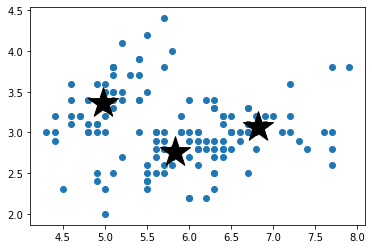

In [8]:
# Obtiene las coordenadas de los centroides
C = modelo[0]

# Grafica los datos agrupados
plt.scatter(X[:,0],X[:,1])
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)

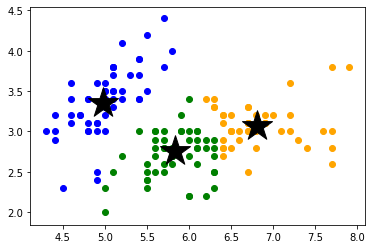

In [9]:
u = modelo[1]
cluster_membership = np.argmax(u, axis=0)

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
for j in range(k):
    plt.scatter(X[cluster_membership == j,0],X[cluster_membership == j,1], color=colors[j])
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)

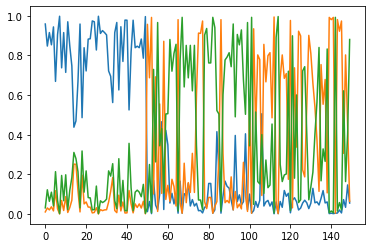

In [10]:
# Grafica las funciones de membresía de los elementos
for j in range(k):
    plt.plot(u[j,:])

### Predicción de nuevos elementos

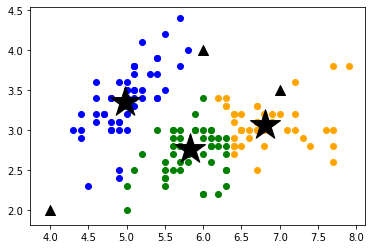

In [11]:
# Datos de prueba (originalmente no están en el conjunto de datos)
Xp = np.array([[4,2],[6,4],[7,3.5]])

# Grafica el dato junto con los grupos obtenidos previamente
for j in range(k):
    plt.scatter(X[cluster_membership == j,0],X[cluster_membership == j,1], color=colors[j])
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)

plt.scatter(Xp[:,0],Xp[:,1],color = 'black', marker = '^', s = 100)

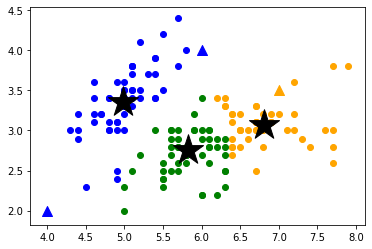

In [13]:
# Predice el grupo al que pertenecen
modelo_pred = fuzz.cluster.cmeans_predict(test_data = np.transpose(Xp), cntr_trained = C, m = 2, 
                                          error = 0.005, maxiter = 1000)

u_pred = modelo_pred[0]
cluster_membership_pred = np.argmax(u_pred, axis=0)

# Grafica la predicción
for j in range(k):
    plt.scatter(X[cluster_membership == j,0],X[cluster_membership == j,1], color=colors[j])
    plt.scatter(Xp[cluster_membership_pred == j,0],Xp[cluster_membership_pred == j,1], marker = '^', color=colors[j], s = 100)
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)